In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

### 1. Load the dataset and display the first 10 rows. How many features does the dataset contain?

In [22]:
df = pd.read_csv('hotelbooking.csv')
df.head(10)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
6,INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
7,INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
8,INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [23]:
print(len(df.columns))

17


This data set contains 17 features

### 2. Provide a statistical summary for the numerical features of the dataset. Which feature has the highest mean?

In [24]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


The feature `average price` has the greatest mean at `103.421636`

### 3. Check the dataset for any missing values. Are there any missing values across the dataset? If yes, list the columns with missing values and their counts.

In [25]:
df.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

There doesn't appear to be any missing values in this dataset

### 4. Plot histograms for three numerical features (‘number of adults’, ‘average price’, ‘lead time’) to examine their distribution.

<Axes: ylabel='Frequency'>

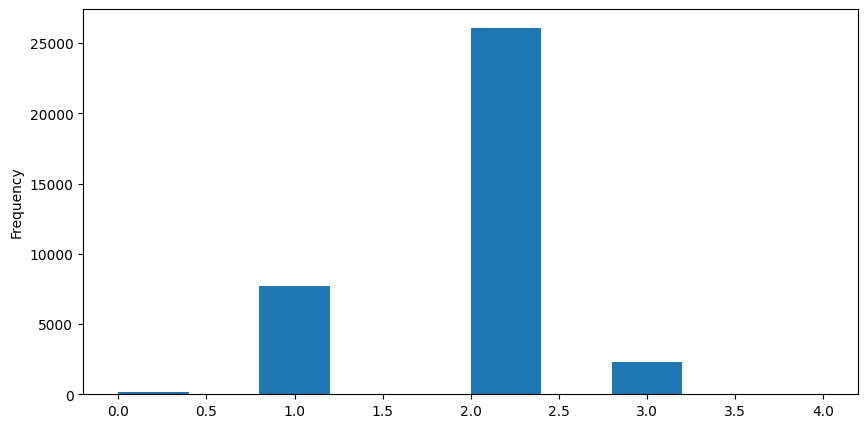

In [26]:
df["number of adults"].plot(kind='hist', bins=10, figsize=(10, 5))

<Axes: ylabel='Frequency'>

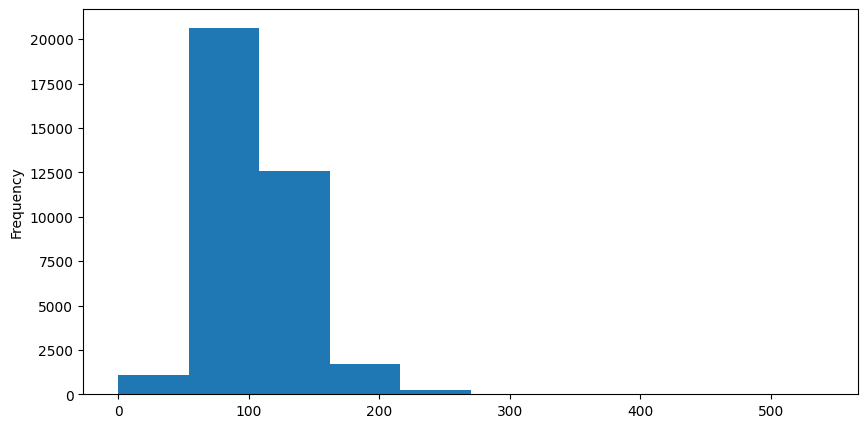

In [27]:
df["average price"].plot(kind='hist', bins=10, figsize=(10, 5))

<Axes: ylabel='Frequency'>

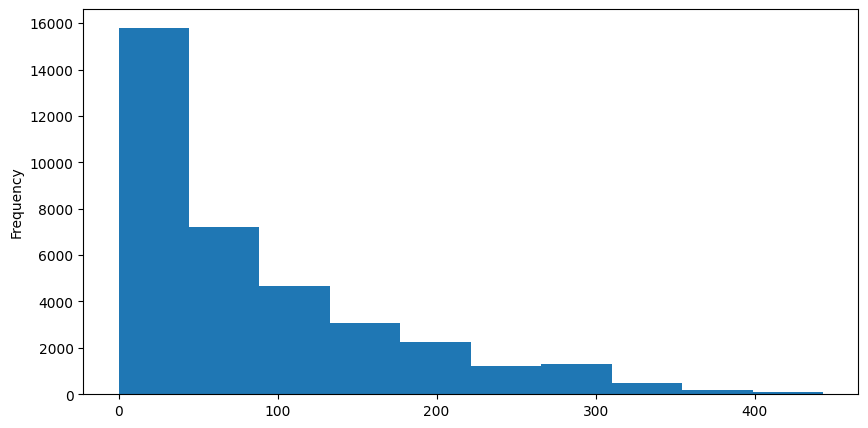

In [28]:
df["lead time"].plot(kind='hist', bins=10, figsize=(10, 5))

The feature `number of adults` has a normal distribution.
The feature `average price` has a right-skewed distribution.
The feature `lead time` has a right-skewed distribution.

### 5. Use boxplots to examine whether there are outliers in the ‘average price’ feature. Explain your observations.

<Axes: >

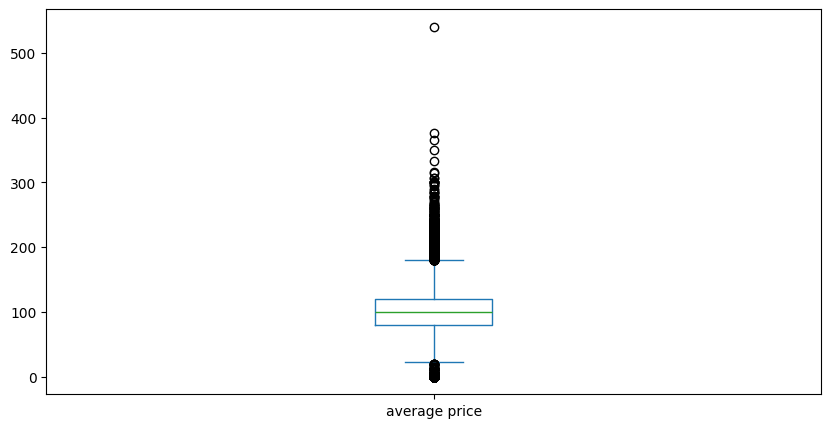

In [29]:
df["average price"].plot(kind='box', figsize=(10, 5))

From the box plot we can see that the average price feature has many outliers (black circles). These are values that either are below the minimum value (Q1 - 1.5\*IQR ) or above the maximum value (Q3 + 1.5\*IQR)

### 6. Compute the correlation matrix and create a heatmap with ‘seaborn’ for numerical features.

<Axes: >

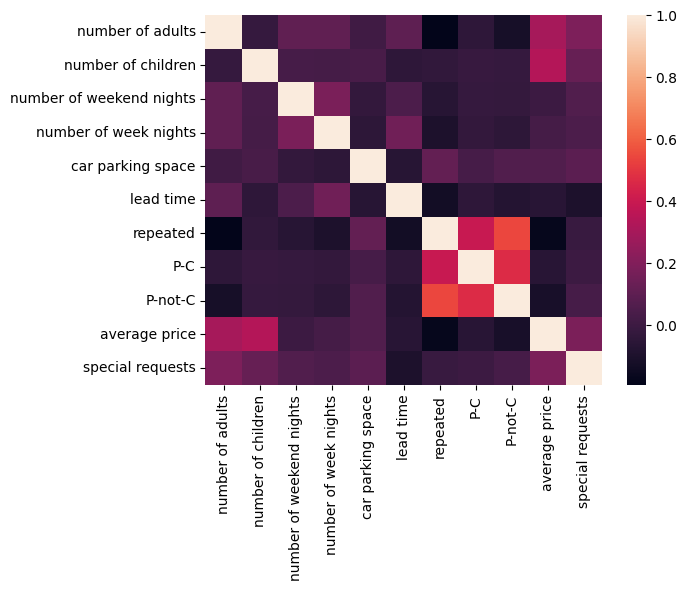

In [30]:

corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=False)

### 7. Create a new feature ‘total nights’ as the sum of ‘number of weekend nights’ and ‘number of week nights’. Show the first 5 rows of your merging result.

In [31]:
df["total nights"] = df["number of weekend nights"] + df["number of week nights"]
df.head(5)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,total nights
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled,7
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled,4
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled,4
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled,2
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled,3


## Decision Tree

### 1. Train a Decision Tree classifier on the ‘booking status’ using features ‘number of adults’, ‘average price’, ‘total nights’ (continuous features), as well as ‘type of meal’ and ‘room type’ (categorical features). Convert the categorical features into numerical format using one-hot encoding. Split the data into an 80-20 train-test set Split the data into 80-20 train-test sets

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [34]:


target = df["booking status"]
features = df[["number of adults", "average price", "total nights", "type of meal", "room type"]]
features = pd.get_dummies(features, columns=["type of meal", "room type"])
features


,number of adults,average price,total nights,type of meal_Meal Plan 1,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,room type_Room_Type 1,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7
0,1,88.00,7,True,False,False,False,True,False,False,False,False,False,False
1,1,106.68,4,False,False,False,True,True,False,False,False,False,False,False
2,2,50.00,4,True,False,False,False,True,False,False,False,False,False,False
3,1,100.00,2,True,False,False,False,True,False,False,False,False,False,False
4,1,77.00,3,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,115.00,2,False,True,False,False,True,False,False,False,False,False,False
36281,2,107.55,4,True,False,False,False,True,False,False,False,False,False,False
36282,2,105.61,4,True,False,False,False,False,False,False,True,False,False,False
36283,3,96.90,4,True,False,False,False,True,False,False,False,False,False,False


In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier()

### 2. Evaluate the Decision Tree model using accuracy and display the confusion matrix

In [15]:
y_pred = decision_tree.predict(X_test)
accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7332230949428138


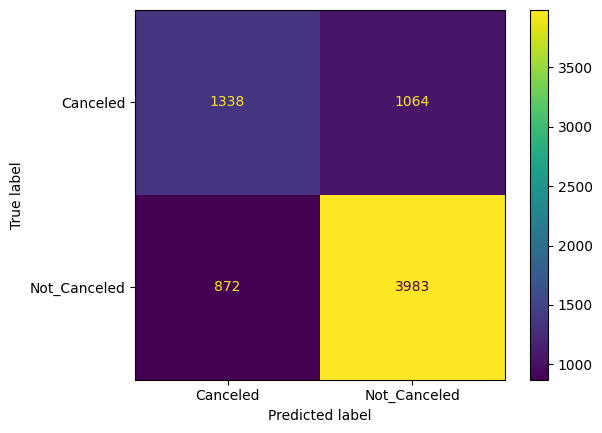

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=decision_tree.classes_)
disp.plot()

### 3. Determine which feature is the most important for making predictions. Display the importance of each feature

<Axes: xlabel='Feature'>

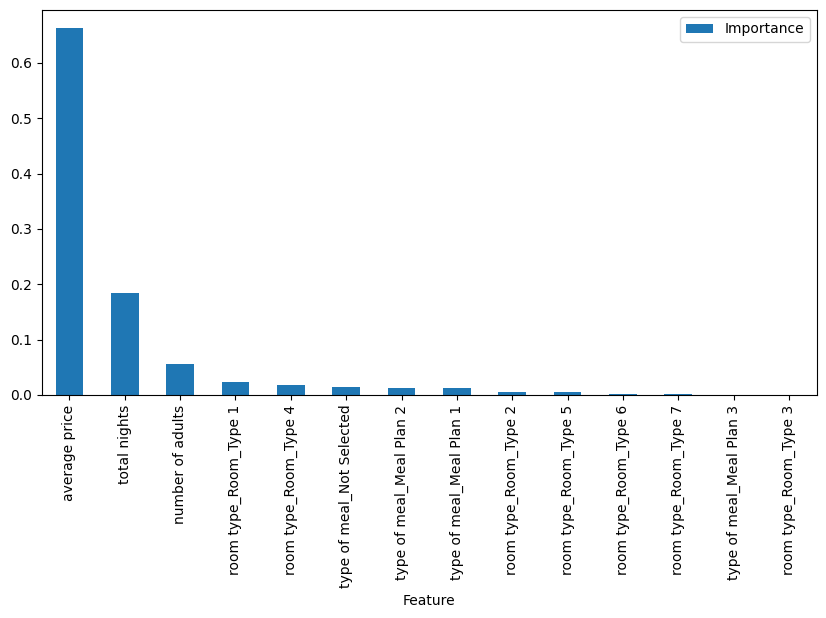

In [17]:
feat_columns = features.columns
feat_importance = decision_tree.feature_importances_
feat_importance_df = pd.DataFrame({"Feature": feat_columns, "Importance": feat_importance}).sort_values(by="Importance", ascending=False)
feat_importance_df.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 5))
# combine all columns that start with type of meal into one colum

According to `scikit-learn`'s calculated feature importance, `average price` is the most important feature for making predictions.